# 데이터셋별 EDA

In [98]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from konlpy.tag import Mecab

## 1) 동형이의어구별셋

In [31]:
# load
train = pd.read_csv('[말뭉치] 동형이의어구별/NIKL_SKT_WiC_Train.tsv', sep='\t')
dev = pd.read_csv('[말뭉치] 동형이의어구별/NIKL_SKT_WiC_Dev.tsv', sep='\t')
test = pd.read_csv('[말뭉치] 동형이의어구별/NIKL_SKT_WiC_Test.tsv', sep='\t')

In [32]:
train.head()

,ID,Target,SENTENCE1,SENTENCE2,ANSWER,start_s1,end_s1,start_s2,end_s2
0,1,단정,그의 죽음은 타살로 단정이 되었다.,단정이 된 교실은 정돈되어 있다.,False,11,13,0,2
1,2,단수,현대 생활에서 단전과 단수의 고통은 겪어 보지 않으면 짐작도 못한다.,사업자를 단수로 할지 복수로 할지를 놓고 관계자들 사이에 입씨름이 벌어졌다.,False,12,14,5,7
2,3,화성,"화성은 밤과 낮, 하루의 길이와 계절의 변화가 지구와 매우 비슷하다.",화성은 서양 음악을 이루는 중요한 요소이다.,False,0,2,0,2
3,4,자전,달의 자전 주기는 달이 지구의 둘레를 공전하는 주기와 같다.,태양계의 모든 행성은 자전을 한다.,True,3,5,12,14
4,5,동지,오늘의 적이 내일은 동지가 될 수 있다.,동지에 무와 감자를 나누어 심었다.,False,11,13,0,2


In [33]:
# 문장 개수
print('train set: ', len(train))
print('dev set: ', len(dev))
print('test set: ', len(test))

train set:  7748
dev set:  1166
test set:  1246


In [62]:
# 결측치 확인
train.isnull().sum()

ID           0
Target       0
SENTENCE1    0
SENTENCE2    0
ANSWER       0
start_s1     0
end_s1       0
start_s2     0
end_s2       0
dtype: int64

In [63]:
dev.isnull().sum()

ID           0
Target       0
SENTENCE1    0
SENTENCE2    0
ANSWER       0
start_s1     0
end_s1       0
start_s2     0
end_s2       0
dtype: int64

In [64]:
test.isnull().sum()

ID           0
Target       0
SENTENCE1    0
SENTENCE2    0
ANSWER       0
start_s1     0
end_s1       0
start_s2     0
end_s2       0
dtype: int64

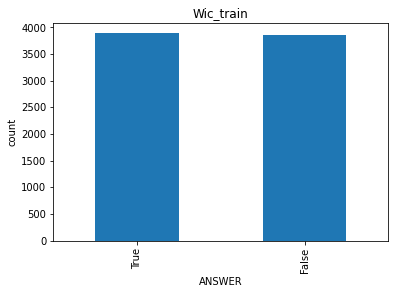

In [96]:
# ANSWER 별 빈도수 (train)
train['ANSWER'] = train['ANSWER'].apply(lambda x: str(x))

y = train['ANSWER'].value_counts()
y.plot(kind='bar')

plt.xlabel('ANSWER')
plt.ylabel('count')
plt.title('Wic_train')
    
plt.show()


In [92]:
# 빈도표
y

True     3887
False    3861
Name: ANSWER, dtype: int64

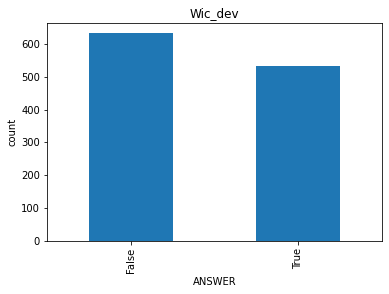

In [97]:
# ANSWER 별 빈도수 (dev)
dev['ANSWER'] = dev['ANSWER'].apply(lambda x: str(x))

y = dev['ANSWER'].value_counts()
y.plot(kind='bar')

plt.xlabel('ANSWER')
plt.ylabel('count')
plt.title('Wic_dev')
    
plt.show()


In [95]:
# 빈도표
y

False    633
True     533
Name: ANSWER, dtype: int64

In [102]:
# 문장 길이(단위: 형태소)
mecab = Mecab()

train['SENTENCE1_morp'] = train['SENTENCE1'].apply(lambda x: mecab.morphs(x))
train['SENTENCE1_len'] = train['SENTENCE1_morp'].apply(lambda x: len(x))
train['SENTENCE2_morp'] = train['SENTENCE2'].apply(lambda x: mecab.morphs(x))
train['SENTENCE2_len'] = train['SENTENCE2_morp'].apply(lambda x: len(x))

dev['SENTENCE1_morp'] = dev['SENTENCE1'].apply(lambda x: mecab.morphs(x))
dev['SENTENCE1_len'] = dev['SENTENCE1_morp'].apply(lambda x: len(x))
dev['SENTENCE2_morp'] = dev['SENTENCE2'].apply(lambda x: mecab.morphs(x))
dev['SENTENCE2_len'] = dev['SENTENCE2_morp'].apply(lambda x: len(x))

test['SENTENCE1_morp'] = test['SENTENCE1'].apply(lambda x: mecab.morphs(x))
test['SENTENCE1_len'] = test['SENTENCE1_morp'].apply(lambda x: len(x))
test['SENTENCE2_morp'] = test['SENTENCE2'].apply(lambda x: mecab.morphs(x))
test['SENTENCE2_len'] = test['SENTENCE2_morp'].apply(lambda x: len(x))

In [104]:
# 박스플롯 그리는 함수
def plot_box(df, colname):
    box_ =  plt.boxplot(df[colname], labels=[colname])
    plt.show()
    dict_ = {}
    dict_["label"] = colname
    dict_["cap_bottom"] = box_['caps'][0].get_ydata()[0]
    dict_["perc_25"] = box_['boxes'][0].get_ydata().min()
    dict_["median"] = box_['medians'][0].get_ydata()[1]
    dict_["perc_75"] = box_['boxes'][0].get_ydata().max()
    dict_["cap_top"] = box_['caps'][1].get_ydata()[0]
    return pd.DataFrame([dict_])

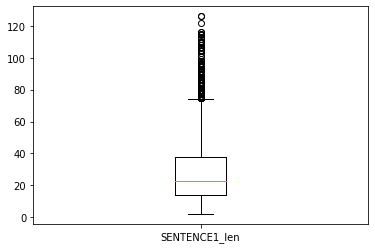

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,SENTENCE1_len,2.0,14.0,23.0,38.0,74.0


In [107]:
# train, 문장 길이
plot_box(train, 'SENTENCE1_len')

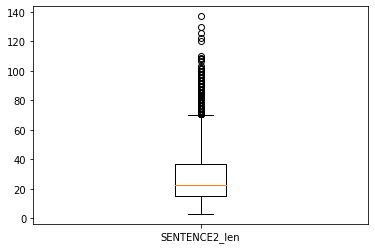

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,SENTENCE2_len,3.0,15.0,23.0,37.0,70.0


In [108]:
# train, 문장 길이
plot_box(train, 'SENTENCE2_len')

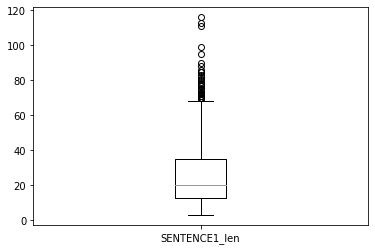

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,SENTENCE1_len,3.0,13.0,20.0,35.0,68.0


In [109]:
# dev, 문장 길이
plot_box(dev, 'SENTENCE1_len')

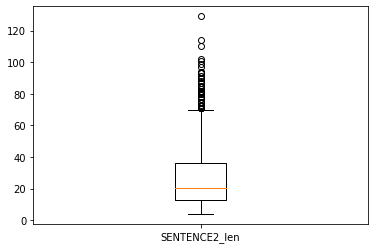

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,SENTENCE2_len,4.0,13.0,20.5,36.0,70.0


In [110]:
# dev, 문장 길이
plot_box(dev, 'SENTENCE2_len')

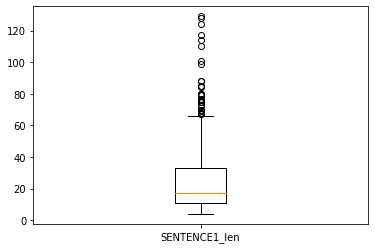

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,SENTENCE1_len,4.0,11.0,17.0,33.0,66.0


In [111]:
# test, 문장 길이
plot_box(test, 'SENTENCE1_len')

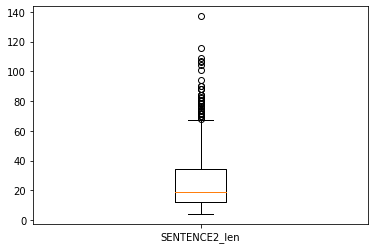

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,SENTENCE2_len,4.0,12.0,18.5,34.0,67.0


In [112]:
# test, 문장 길이
plot_box(test, 'SENTENCE2_len')

In [124]:
# Target별 예시 문장 수 (train)
# '맞', '들', '맡' 등이 특히 동형이의어 예시 문장을 많이 갖고 있음.

y = train['Target'].value_counts()
y[:20]

맞     749
들     604
맡     318
보인    266
따라    196
쓰     171
묻     140
뛰     123
이르    117
보이    115
보여    111
타     104
따르     89
쉬      53
쓴      52
달      50
치      48
물      45
말      43
강한     43
Name: Target, dtype: int64

In [125]:
# Target별 예시 문장 수 (dev)
y = dev['Target'].value_counts()
y[:20]

맞     116
들      65
맡      39
보인     33
쓰      22
이르     19
따라     18
묻      16
뛰      11
쉬      11
보여     10
달      10
쓴      10
보이      9
타       8
불리      8
강한      8
따르      8
물리      7
치       7
Name: Target, dtype: int64

In [126]:
# Target별 예시 문장 수 (test)
y = test['Target'].value_counts()
y[:20]

맞     85
들     69
맡     40
보인    37
쓰     30
따라    23
이르    21
묻     18
따르    15
보여    15
뛰     11
쉬      9
타      8
물      8
달      7
감      6
지      6
보이     6
갈      6
치      6
Name: Target, dtype: int64

## 2) 문법성 판단셋

In [128]:
# load
train = pd.read_csv('[말뭉치] 문장 문법성 판단/NIKL_CoLA_train.tsv', sep='\t')
dev = pd.read_csv('[말뭉치] 문장 문법성 판단/NIKL_CoLA_dev.tsv', sep='\t')
test = pd.read_csv('[말뭉치] 문장 문법성 판단/NIKL_CoLA_test.tsv', sep='\t')

In [129]:
train.head()

,source,acceptability_label,source_annotation,sentence
0,T00001,1,NaN,높은 달이 떴다.
1,T00001,0,*,달이 뜸이 높았다.
2,T00002,1,NaN,실없는 사람이 까불까불한다.
3,T00003,1,NaN,나는 철수에게 공을 던졌다.
4,T00004,1,NaN,내가 순이와 둘이서 다툰다.


In [130]:
# 문장 개수
print('train set: ', len(train))
print('dev set: ', len(dev))
print('test set: ', len(test))

train set:  15876
dev set:  2032
test set:  1060


In [131]:
# 결측치 확인
train.isnull().sum()

source                    0
acceptability_label       0
source_annotation      7912
sentence                  0
dtype: int64

In [132]:
# 결측치 확인
dev.isnull().sum()

source                    0
acceptability_label       0
source_annotation      1070
sentence                  0
dtype: int64

In [133]:
# 결측치 확인
test.isnull().sum()

index       0
sentence    0
dtype: int64

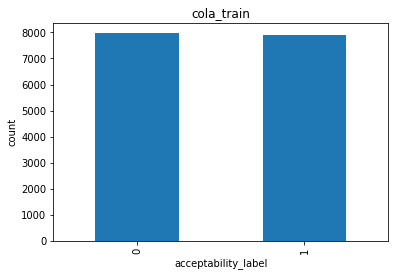

In [134]:
# acceptability_label별 빈도수 (train)
train['acceptability_label'] = train['acceptability_label'].apply(lambda x: str(x))

y = train['acceptability_label'].value_counts()
y.plot(kind='bar')

plt.xlabel('acceptability_label')
plt.ylabel('count')
plt.title('cola_train')
    
plt.show()


In [135]:
y

0    7964
1    7912
Name: acceptability_label, dtype: int64

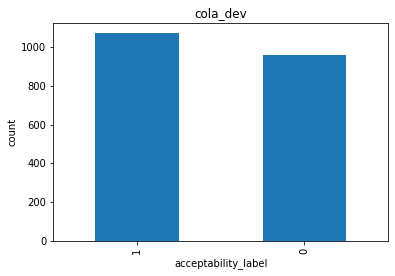

In [136]:
# acceptability_label별 빈도수 (dev)
dev['acceptability_label'] = dev['acceptability_label'].apply(lambda x: str(x))

y = dev['acceptability_label'].value_counts()
y.plot(kind='bar')

plt.xlabel('acceptability_label')
plt.ylabel('count')
plt.title('cola_dev')
    
plt.show()


In [137]:
y

1    1071
0     961
Name: acceptability_label, dtype: int64

In [138]:
# 문장 길이(단위: 형태소)
mecab = Mecab()

train['sentence_morp'] = train['sentence'].apply(lambda x: mecab.morphs(x))
train['sentence_len'] = train['sentence_morp'].apply(lambda x: len(x))

dev['sentence_morp'] = dev['sentence'].apply(lambda x: mecab.morphs(x))
dev['sentence_len'] = dev['sentence_morp'].apply(lambda x: len(x))

test['sentence_morp'] = test['sentence'].apply(lambda x: mecab.morphs(x))
test['sentence_len'] = test['sentence_morp'].apply(lambda x: len(x))

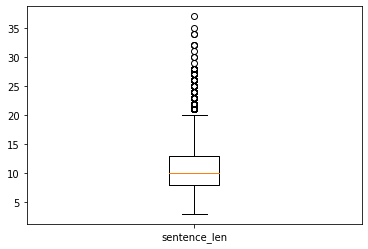

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,sentence_len,3.0,8.0,10.0,13.0,20.0


In [140]:
# train, 문장 길이
plot_box(train, 'sentence_len')

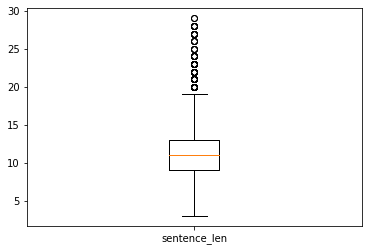

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,sentence_len,3.0,9.0,11.0,13.0,19.0


In [141]:
# dev, 문장 길이
plot_box(dev, 'sentence_len')

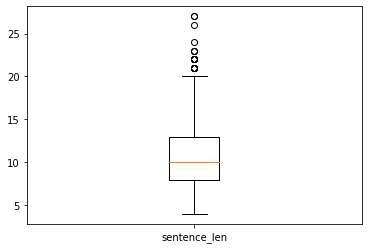

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,sentence_len,4.0,8.0,10.0,13.0,20.0


In [142]:
# test, 문장 길이
plot_box(test, 'sentence_len')

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

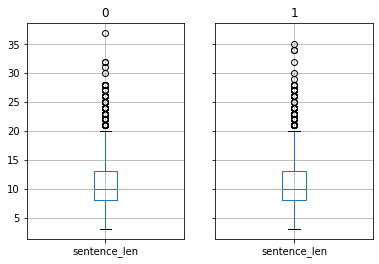

In [155]:
# 비문 여부에 따른 문장 길이의 분포
# 문장이 길어지다 보면 비문이라고 판단할 가능성이 더 증가하지 않을까?
# But, 큰 차이는 없어보임.

# train
grouped = train.groupby('acceptability_label')
grouped.boxplot()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

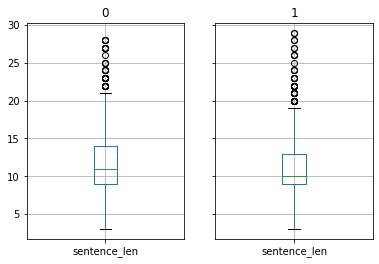

In [156]:
# dev
grouped = dev.groupby('acceptability_label')
grouped.boxplot()

## 3) 인과관계추론셋

In [157]:
# load
train = pd.read_csv('[말뭉치] 인과 관계 추론/SKT_COPA_train.tsv', sep='\t')
dev = pd.read_csv('[말뭉치] 인과 관계 추론/SKT_COPA_dev.tsv', sep='\t')
test = pd.read_csv('[말뭉치] 인과 관계 추론/SKT_COPA_test.tsv', sep='\t')

In [158]:
train.head()

,ID,sentence,question,1,2,Answer
0,1,이퀄라이저로 저음 음역대 소리 크기를 키웠다.,결과,베이스 소리가 잘 들리게 되었다.,베이스 소리가 들리지 않게 되었다.,1
1,2,음료에 초콜렛 시럽을 넣었다.,결과,음료수가 더 달아졌다.,음료수가 차가워졌다.,1
2,3,남자는 휴대폰을 호수에 빠뜨렸다.,결과,휴대폰이 업그레이드 되었다.,휴대폰이 고장났다.,2
3,4,옆 집 사람이 이사를 나갔다.,원인,옆 집 사람은 계약이 완료되었다.,옆 집 사람은 계약을 연장했다.,1
4,5,문을 밀었다.,결과,문이 잠겼다.,문이 열렸다.,2


In [159]:
# 문장 개수
print('train set: ', len(train))
print('dev set: ', len(dev))
print('test set: ', len(test))

train set:  3080
dev set:  500
test set:  500


In [160]:
# 결측치 확인
train.isnull().sum()

ID          0
sentence    0
question    0
1           0
2           0
Answer      0
dtype: int64

In [161]:
# 결측치 확인
dev.isnull().sum()

ID          0
sentence    0
question    0
1           0
2           0
Answer      0
dtype: int64

In [162]:
# 결측치 확인
test.isnull().sum()

ID            0
sentence      0
question      0
1             0
2             0
Answer      500
dtype: int64

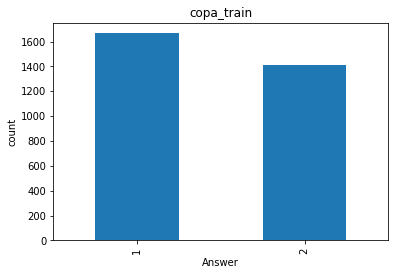

In [165]:
# Answer별 빈도수 (train)
train['Answer'] = train['Answer'].apply(lambda x: str(x))

y = train['Answer'].value_counts()
y.plot(kind='bar')

plt.xlabel('Answer')
plt.ylabel('count')
plt.title('copa_train')
    
plt.show()


In [166]:
# 빈도표
y

1    1666
2    1414
Name: Answer, dtype: int64

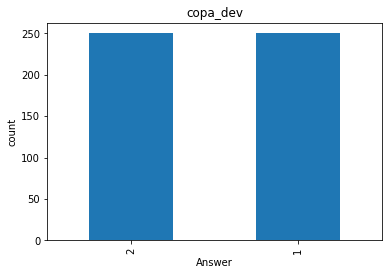

In [183]:
# Answer별 빈도수(dev)
dev['Answer'] = dev['Answer'].apply(lambda x: str(x))

y = dev['Answer'].value_counts()
y.plot(kind='bar')

plt.xlabel('Answer')
plt.ylabel('count')
plt.title('copa_dev')
    
plt.show()


In [184]:
# 빈도표
y

2    250
1    250
Name: Answer, dtype: int64

In [172]:
# 문장 길이(단위: 형태소)
mecab = Mecab()

train['sentence_morp'] = train['sentence'].apply(lambda x: mecab.morphs(x))
train['sentence_len'] = train['sentence_morp'].apply(lambda x: len(x))
train['1_morp'] = train['1'].apply(lambda x: mecab.morphs(x))
train['1_len'] = train['1_morp'].apply(lambda x: len(x))
train['2_morp'] = train['2'].apply(lambda x: mecab.morphs(x))
train['2_len'] = train['2_morp'].apply(lambda x: len(x))


dev['sentence_morp'] = dev['sentence'].apply(lambda x: mecab.morphs(x))
dev['sentence_len'] = dev['sentence_morp'].apply(lambda x: len(x))
dev['1_morp'] = dev['1'].apply(lambda x: mecab.morphs(x))
dev['1_len'] = dev['1_morp'].apply(lambda x: len(x))
dev['2_morp'] = dev['2'].apply(lambda x: mecab.morphs(x))
dev['2_len'] = dev['2_morp'].apply(lambda x: len(x))


test['sentence_morp'] = test['sentence'].apply(lambda x: mecab.morphs(x))
test['sentence_len'] = test['sentence_morp'].apply(lambda x: len(x))
test['1_morp'] = test['1'].apply(lambda x: mecab.morphs(x))
test['1_len'] = test['1_morp'].apply(lambda x: len(x))
test['2_morp'] = test['2'].apply(lambda x: mecab.morphs(x))
test['2_len'] = test['2_morp'].apply(lambda x: len(x))

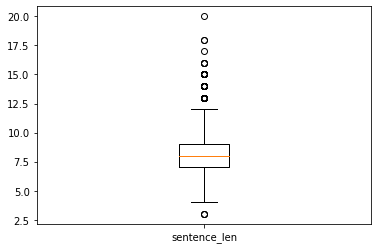

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,sentence_len,4.0,7.0,8.0,9.0,12.0


In [174]:
# train, 문장 길이
plot_box(train, 'sentence_len')

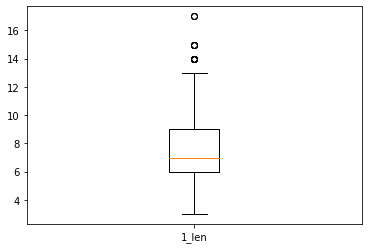

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,1_len,3.0,6.0,7.0,9.0,13.0


In [175]:
# train, 칼럼 1 길이
plot_box(train, '1_len')

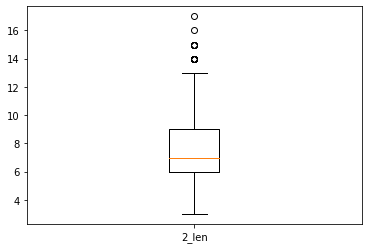

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,2_len,3.0,6.0,7.0,9.0,13.0


In [176]:
# train, 칼럼 2 길이
plot_box(train, '2_len')

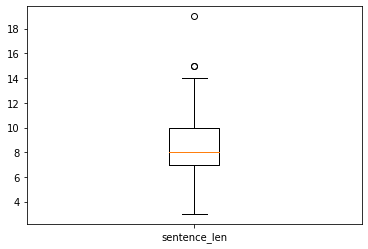

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,sentence_len,3.0,7.0,8.0,10.0,14.0


In [177]:
# dev, 문장 길이
plot_box(dev, 'sentence_len')

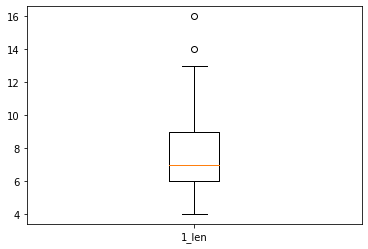

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,1_len,4.0,6.0,7.0,9.0,13.0


In [178]:
# dev, 칼럼 1 길이
plot_box(dev, '1_len')

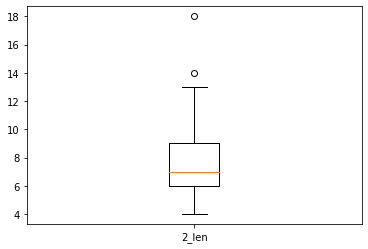

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,2_len,4.0,6.0,7.0,9.0,13.0


In [179]:
# dev, 칼럼 2 길이
plot_box(dev, '2_len')

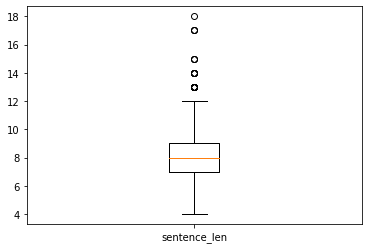

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,sentence_len,4.0,7.0,8.0,9.0,12.0


In [180]:
# test, 문장 길이
plot_box(test, 'sentence_len')

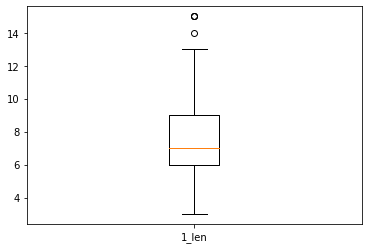

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,1_len,3.0,6.0,7.0,9.0,13.0


In [181]:
# test, 칼럼 1 길이
plot_box(test, '1_len')

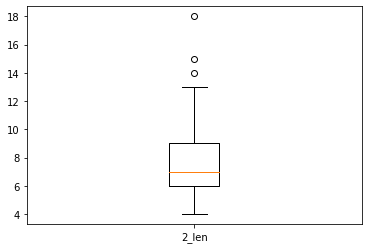

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,2_len,4.0,6.0,7.0,9.0,13.0


In [182]:
# test, 칼럼 2 길이
plot_box(test, '2_len')

## 4) 판정 의문문셋

In [185]:
# load
train = pd.read_csv('[말뭉치] 판정 의문문/SKT_BoolQ_train.tsv', sep='\t')
dev = pd.read_csv('[말뭉치] 판정 의문문/SKT_BoolQ_dev.tsv', sep='\t')
test = pd.read_csv('[말뭉치] 판정 의문문/SKT_BoolQ_test.tsv', sep='\t')

In [186]:
train.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)"
0,1,로마 시대의 오리엔트의 범위는 제국 내에 동부 지방은 물론 제국 외부에 있는 다른 ...,"오리엔트는 인도와 중국, 일본을 이루는 광범위한 지역을 지칭하는 단어로 쓰인다.",1
1,2,비글을 키우려면 비글이 뛰어놀수 있는 넓은 놀이공간 등을 확보하고 있는 단독주택이 ...,비글은 넓고 뚤린 공간에서 키워야 한다.,1
2,3,타이완 요리의 특징은 토속 요리(일본 통치 전)에서 기름을 많이 사용하는 다른 지역...,타이완 요리는 다른 지역의 중국 요리처럼 기름을 많이 사용하는 것이다.,0
3,4,연하곤란은 음식물이 구강에서 식도로 넘어가는 과정에 문제가 생겨 음식을 원활히 혹은...,연하곤란이 생기면 식도가 막히나요?,0
4,5,"인문과학 또는 인문학(人文學, 영어: humanities)은 인간과 인간의 근원문제...",인문과학은 경험적인 접근을 주로 사용하는가?,0


In [187]:
# 결측치 확인
train.isnull().sum()

ID                             0
Text                           0
Question                       0
Answer(FALSE = 0, TRUE = 1)    0
dtype: int64

In [188]:
# 결측치 확인
dev.isnull().sum()

ID                             0
Text                           0
Question                       0
Answer(FALSE = 0, TRUE = 1)    0
dtype: int64

In [189]:
# 결측치 확인
test.isnull().sum()

ID                               0
Text                             0
Question                         0
Answer(FALSE = 0, TRUE = 1)    704
dtype: int64

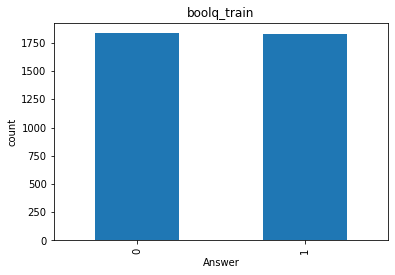

In [191]:
# Answer별 빈도수
# train
train['Answer(FALSE = 0, TRUE = 1)'] = train['Answer(FALSE = 0, TRUE = 1)'].apply(lambda x: str(x))

y = train['Answer(FALSE = 0, TRUE = 1)'].value_counts()
y.plot(kind='bar')

plt.xlabel('Answer')
plt.ylabel('count')
plt.title('boolq_train')
    
plt.show()


In [192]:
# 빈도표
y

0    1834
1    1831
Name: Answer(FALSE = 0, TRUE = 1), dtype: int64

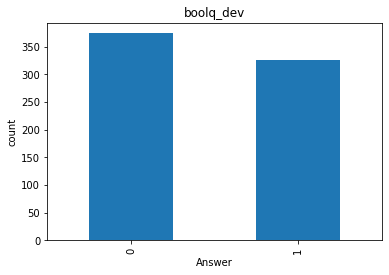

In [193]:
# Answer별 빈도수
# dev
dev['Answer(FALSE = 0, TRUE = 1)'] = dev['Answer(FALSE = 0, TRUE = 1)'].apply(lambda x: str(x))

y = dev['Answer(FALSE = 0, TRUE = 1)'].value_counts()
y.plot(kind='bar')

plt.xlabel('Answer')
plt.ylabel('count')
plt.title('boolq_dev')
    
plt.show()


In [194]:
# 빈도표
y

0    374
1    326
Name: Answer(FALSE = 0, TRUE = 1), dtype: int64

In [195]:
# 문장 길이(단위: 형태소)
mecab = Mecab()

train['Text_morp'] = train['Text'].apply(lambda x: mecab.morphs(x))
train['Text_len'] = train['Text_morp'].apply(lambda x: len(x))
train['Question_morp'] = train['Question'].apply(lambda x: mecab.morphs(x))
train['Question_len'] = train['Question_morp'].apply(lambda x: len(x))


dev['Text_morp'] = dev['Text'].apply(lambda x: mecab.morphs(x))
dev['Text_len'] = dev['Text_morp'].apply(lambda x: len(x))
dev['Question_morp'] = dev['Question'].apply(lambda x: mecab.morphs(x))
dev['Question_len'] = dev['Question_morp'].apply(lambda x: len(x))


test['Text_morp'] = test['Text'].apply(lambda x: mecab.morphs(x))
test['Text_len'] = test['Text_morp'].apply(lambda x: len(x))
test['Question_morp'] = test['Question'].apply(lambda x: mecab.morphs(x))
test['Question_len'] = test['Question_morp'].apply(lambda x: len(x))

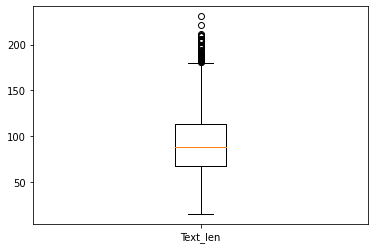

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,Text_len,15.0,68.0,88.0,113.0,180.0


In [196]:
# train, Text
# 다른 데이터셋들에 비해 Text 칼럼의 길이가 상당히 긺. (문단 수준)
plot_box(train, 'Text_len')

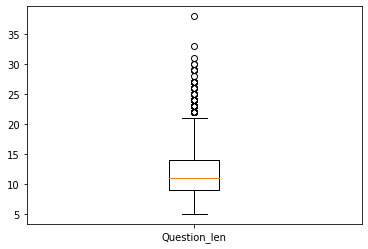

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,Question_len,5.0,9.0,11.0,14.0,21.0


In [197]:
# train, Q
plot_box(train, 'Question_len')

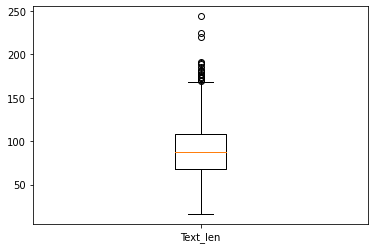

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,Text_len,16.0,68.0,87.0,108.0,168.0


In [198]:
# dev, Text
plot_box(dev, 'Text_len')

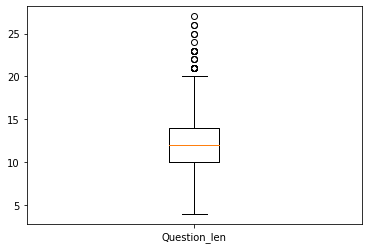

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,Question_len,4.0,10.0,12.0,14.0,20.0


In [199]:
# dev, Q
plot_box(dev, 'Question_len')

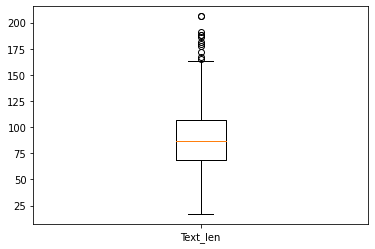

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,Text_len,17.0,69.0,87.0,107.0,163.0


In [200]:
# test, Text
plot_box(test, 'Text_len')

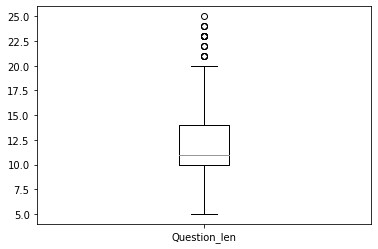

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,Question_len,5.0,10.0,11.0,14.0,20.0


In [201]:
# test, Q
plot_box(test, 'Question_len')